Para la implementación del progama se tuvieron en cuenta los siguientes aspectos:

1. **Inicialización**: Crea una matriz $V$ de dimensiones $N X M$ para representar los valores del potencial en cada punto de la red. Inicialmente, se asigna a todos los puntos internos de la red un valor arbitrario y luego se establece los valores en los bordes según las condiciones de frontera

2. **Actualización del potencial**: Para cada punto interno de la red, se realiza una actualización el valor de $V(x, y)$ al promedio de los valores de sus cuatro vecinos inmediatos (arriba, abajo, izquierda, derecha).

3. **Entradas**: Las entradas del programa serán el número de puntos de la red \(N, M\), el paso \(dx = dy\), y los valores de las condiciones de frontera \(V_0(x, y)\) en los bordes.



In [26]:
import numpy as np
# Se define una función llamada `inicializar_matriz`. Esta función es la encargada de crear la matriz inicial de potenciales V.
# Aqui se reciben tres parámetros:
# N: número de filas de la matriz.
# M: número de columnas de la matriz.
# V_borde: un diccionario con los valores de potencial en los bordes de la matriz.
def inicializar_matriz(N, M, V_borde):
    # Crea una matriz de ceros con N filas y M columnas.
    # Aquii se tiene el estado inicial de la matriz de potenciales V, donde todos los valores son 0
    V = np.zeros((N, M))
    # Luego se asigna los valores de potencial en los bordes de la matriz V.
    # V[0, :] = V_borde['arriba'] asigna el valor del borde superior a la primera fila de la matriz
    # V[-1, :] = V_borde['abajo'] asigna el valor del borde inferior a la última fila de la matriz.
    # V[:, 0] = V_borde['izquierda'] asigna el valor del borde izquierdo a la primera columna de la matriz.
    # V[:, -1] = V_borde['derecha'] asigna el valor del borde derecho a la última columna de la matriz.
    V[0, :] = V_borde['arriba']
    V[-1, :] = V_borde['abajo']
    V[:, 0] = V_borde['izquierda']
    V[:, -1] = V_borde['derecha']

    # La función retorna la matriz V ya inicializada.
    return V

# Define otra función `actualizar_potencial`.
# esta función es utilizada para calcular el nuevo potencial en cada punto interno de la matriz basado en el promedio de sus vecios más cercanos.
def actualizar_potencial(V):
    # Aqui se crea una copia de la matriz V para no modificar la matriz original mientrass se actualiza.
    V_nuevo = V.copy()

    # Luego se recorre cada punto interno de la matriz, excluyendo los bordes.
    # Posteriormente el promedio de los vecinos se asigna a cada punto interno
    # i y j son índices que recorren las filas y columnas.
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):
            # V_nuevo[i, j] se actualiza como el promedio de los cuatro vecinos
            V_nuevo[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
    # Retorna la matriz de potenciales actualizada.
    return V_nuevo

# En este punto se define la función `resolver_laplace`.
# Esta función utiliza las dos funciones anteriores para resolver la ecuación de Laplace.
# El código continúa el proceso hasta que la solución converge, es decir, hasta que los cambios son lo suficientemente pequeños.
def resolver_laplace(N, M, V_borde, epsilon=1e-5):
    # Se inicia la matriz de potenciales con los valores de borde.
    V = inicializar_matriz(N, M, V_borde)

    # Inicia una variable delta para el control del bucle while.
    # Este bucle se ejecuta hasta que el cambio máximo entre la matriz actualizada y la original sea menor que epsilon.
    delta = 1.0
    while delta > epsilon:
        # Actualiza la matriz de potenciales.
        V_nuevo = actualizar_potencial(V)
        # Calcula el cambio máximo (delta) entre la matriz actualizada y la original.
        delta = np.max(np.abs(V_nuevo - V))
        # Actualiza la matriz V con los nuevos valores calculados.
        V = V_nuevo
    # Retorna la matriz de potenciales una vez que ha convergido.
    return V

# Sección principal del código que se ejecutará cuando se corra el script.
# Define las dimensiones de la red (N y M) y las condiciones de frontera en un diccionario (V_borde).
N, M = 10, 10  # Tamaño de la red
V_borde = {'arriba': 1, 'abajo': 0, 'izquierda': 0, 'derecha': 0}  # Condiciones de frontera

# Llama a la función `resolver_laplace` con los parámetros definidos y guarda el resultado en V.
V = resolver_laplace(N, M, V_borde)

# Imprime la matriz de potenciales resultante en la consola.
print(V)


[[0.         1.         1.         1.         1.         1.
  1.         1.         1.         0.        ]
 [0.         0.4862724  0.66910261 0.74470885 0.77340906 0.77340906
  0.74470885 0.66910261 0.4862724  0.        ]
 [0.         0.27599142 0.44543749 0.53633492 0.57553108 0.57553108
  0.53633492 0.44543749 0.27599142 0.        ]
 [0.         0.1722641  0.30033663 0.37968332 0.41687318 0.41687318
  0.37968332 0.30033663 0.1722641  0.        ]
 [0.         0.11273956 0.20398263 0.26521692 0.29543737 0.29543737
  0.26521692 0.20398263 0.11273956 0.        ]
 [0.         0.07472424 0.13766136 0.18179658 0.20425867 0.20425867
  0.18179658 0.13766136 0.07472424 0.        ]
 [0.         0.04850877 0.09016593 0.12008162 0.13557872 0.13557872
  0.12008162 0.09016593 0.04850877 0.        ]
 [0.         0.0291561  0.05443301 0.07281358 0.08242813 0.08242813
  0.07281358 0.05443301 0.0291561  0.        ]
 [0.         0.01369094 0.02561206 0.03433261 0.038916   0.038916
  0.03433261 0.0256120

TEST

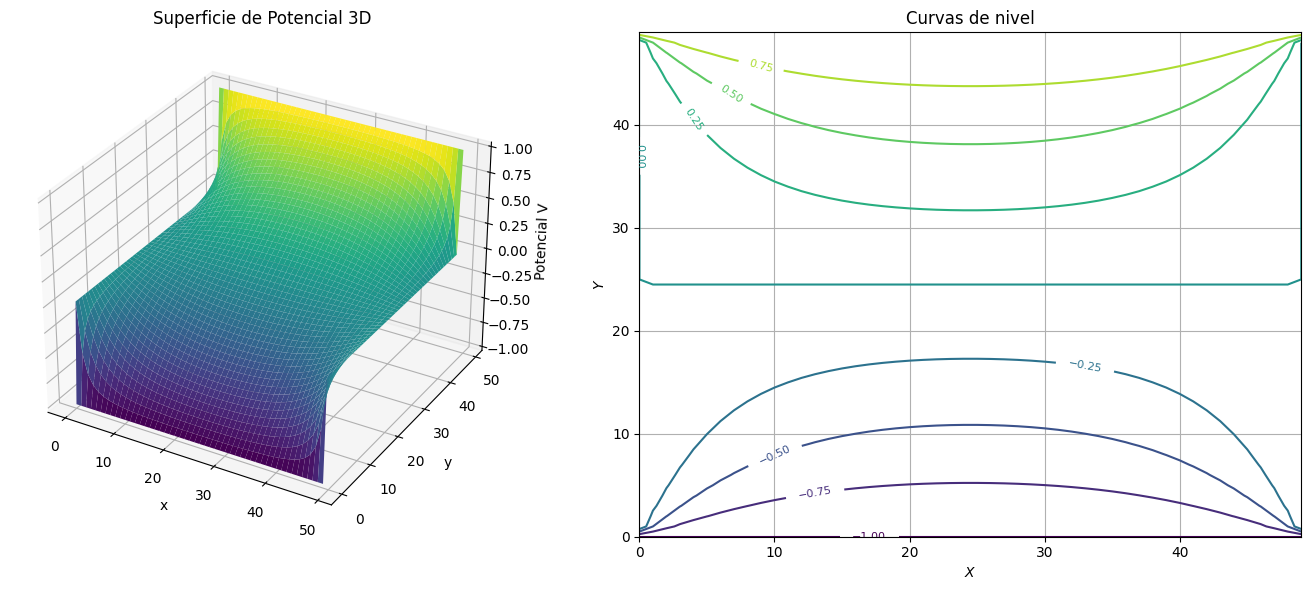

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [ 0.         -0.49907223 -0.69579803 ... -0.69579803 -0.49907223
   0.        ]
 [ 0.         -0.30049121 -0.49628959 ... -0.49628959 -0.30049121
   0.        ]
 ...
 [ 0.          0.30049121  0.49628959 ...  0.49628959  0.30049121
   0.        ]
 [ 0.          0.49907223  0.69579803 ...  0.69579803  0.49907223
   0.        ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
# Desde mpl_toolkits.mplot3d importamos Axes3D, que permite hacer gráficos en tres dimensiones.
from mpl_toolkits.mplot3d import Axes3D

# Se define la función 'actualizar_potencial' que toma como parámetro una matriz de potenciales V.
def actualizar_potencial(V):
    # Se crea una copia de V para no alterar la matriz original mientras se actualiza
    V_nuevo = V.copy()
    # luego se itera sobre cada punto de la matriz, excepto los bordes, para actualizar su valor.
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):
            # Aqui se actualiza el valor del punto (i, j) al promedio de sus vecinos directos.
            V_nuevo[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
    # se retorna la matriz actualizada.
    return V_nuevo

# Se define la función 'inicializar_matriz_con_condiciones' que prepara la matriz de potenciales con condiciones de borde.
def inicializar_matriz_con_condiciones(N, M, v0):
    # Crea una matriz de ceros con N filas y M columnas, que representará la red de potenciales.
    V = np.zeros((N, M))
    # Aqui se establece los valores de potencial en los bordes superior e inferior según el valor dado por 'v0'.
    V[0, :] = -v0  # Borde superior
    V[-1, :] = v0  # Borde inferior
    # Retorna la matriz con las condiciones de frontera aplicadas.
    return V

# Define la función 'resolver_laplace_y_graficar', que resolverá la ecuación de Laplace y mostrará los resultados.
def resolver_laplace_y_graficar(N, M, v0, epsilon=1e-5):
    # Inicia la matriz de potenciales con las condiciones de borde.
    V = inicializar_matriz_con_condiciones(N, M, v0)
    # Establece una variable 'delta' que controlará la precisión de nuestra solución.
    delta = 1.0
    # Continus actualizando la matriz de potenciales hasta que la solución converja a una precisión definida por 'epsilon'.
    while delta > epsilon:
        # Actualiza la matriz de potenciales utilizando la función definida anteriormente.
        V_nuevo = actualizar_potencial(V)
        # Calcula el cambio máximo (delta) entre la matriz actualizada y la anterior.
        delta = np.max(np.abs(V_nuevo - V))
        # La matriz V se actualiza con la nueva matriz calculada.
        V = V_nuevo

    # Crea una malla de puntos que será utilizada para los gráficos en base a las dimensiones M y N.
    X, Y = np.meshgrid(np.arange(M), np.arange(N))

    # Aqui se configura una figura para los gráficos y la subdividimos en dos para mostrar dos gráficos diferentes.
    fig = plt.figure(figsize=(14, 6))
    # Se añade un subgráfico en 3D para la visualización del potencial.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    # Aqui se realiza un gráfico de la superficie de potenciales.
    ax.plot_surface(X, Y, V, cmap='viridis', edgecolor='none')
    # Se configura los títulos y etiquetas de los ejes para el gráfico 3D.
    ax.set_title('Superficie de Potencial 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Potencial V')

    # Se añade otro subgráfico para las curvas de nivel del potencial.
    ax1 = fig.add_subplot(1, 2, 2)
    # Se añade una cuadrícula para mejor visualización.
    ax1.grid()
    # se establece las etiquetas y el título del gráfico de curvas de nivel.
    ax1.set_xlabel(r'$X$')
    ax1.set_ylabel(r'$Y$')
    ax1.set_title('Curvas de nivel')
    # Se genera las curvas de nivel y añadimos etiquetas a cada línea de contorno.
    Lvl_crvs = ax1.contour(X, Y, V)
    ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

    # Ajusta el diseño y mostramos los gráficos.
    plt.tight_layout()
    plt.show()
    # Se retorna la matriz de potenciales resuelta.
    return V

# Aquí se cmabian los parámetros iniciales de nuestro problema, incluyendo las dimensiones de la red y las condiciones de frontera.
N, M = 50, 50  # Dimensiones de la red
v0 = 1  # Valor de potencial para las condiciones de frontera

# Llama a la función 'resolver_laplace_y_graficar' con los parámetros y almacenamos la solución en V.
V = resolver_laplace_y_graficar(N, M, v0)
# Finalmente, imprime la matriz de potenciales resultante.
print(V)


Gráfico analítico

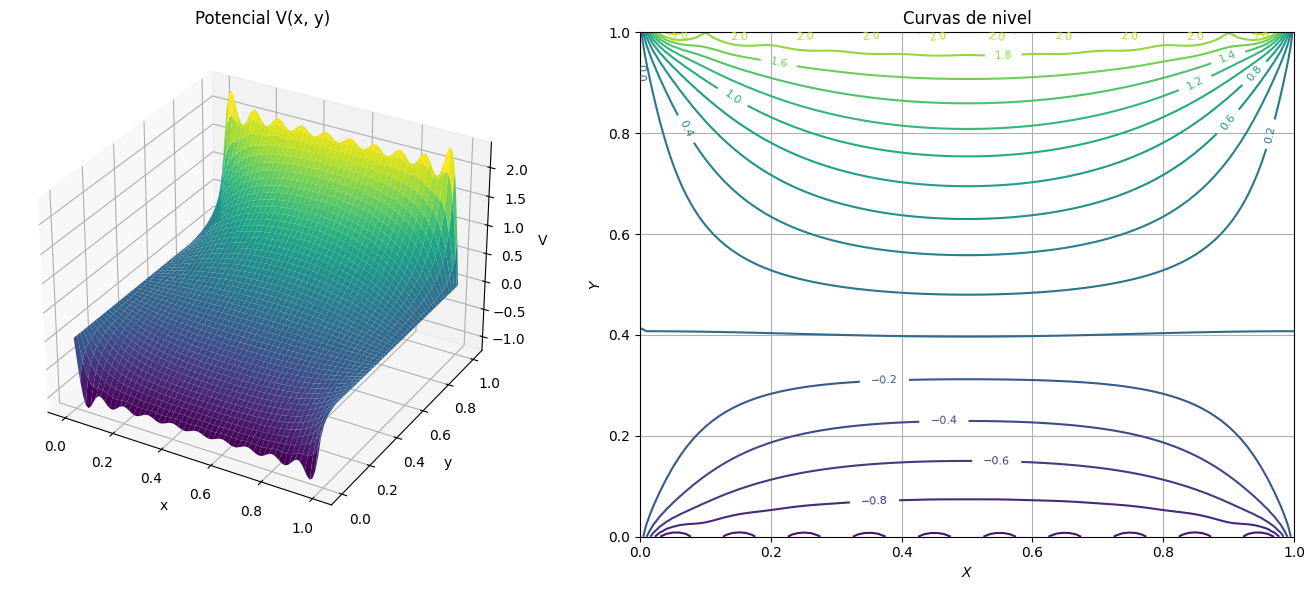

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Se define una función que calcula el potencial dado por una serie de Fourier.
def calcular_potencial(V0, a, b, x, y, N=10):
    # Se inicia una variable que almacenará la suma de la serie.
    suma = 0
    # Se inicia un bucle que suma términos impares de la serie hasta 2*N-1.
    for n in range(1, 2*N, 2):
        # Se calcula el numerador de la expresión de la serie para el término n.
        numerador = ((2*V0*np.sinh(n*np.pi*y/a)) - (V0*np.sinh(n*np.pi*(b-y)/a)))
        # Se calcula el denominador de la expresión de la serie para el término n.
        denominador = np.sinh(n*np.pi*b/a)
        # Se añade a la suma el término n-ésimo de la serie multiplicado por la función seno correspondiente.
        suma += (1/n) * (numerador/denominador) * np.sin(n*np.pi*x/a)
    # Se multiplica la suma total por un factor y se devuelve el potencial calculado.
    return (4/np.pi) * suma

# Se establecen parámetros específicos para el problema.
V0 = 1
a = 1
b = 1
N = 10

# Se generan puntos equidistantes en el dominio para calcular el potencial.
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
# Se crea una malla de puntos en 2D combinando los puntos x e y.
X, Y = np.meshgrid(x, y)
# Se calcula el potencial en todos los puntos de la malla.
Z = calcular_potencial(V0, a, b, X, Y, N)

fig = plt.figure(figsize=(14, 6))

# Se añade un subplot a la figura para el gráfico 3D.
ax = fig.add_subplot(1, 2, 1, projection='3d')
# Se crea un gráfico de superficie 3D para el potencial.
ax.plot_surface(X, Y, Z, cmap='viridis')
# Se establecen el título y las etiquetas de los ejes para el gráfico 3D.
ax.set_title('Potencial V(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')

# Se añade otro subplot para el gráfico de curvas de nivel.
ax1 = fig.add_subplot(1, 2, 2)
# Se habilita la cuadrícula para mejor visualización.
ax1.grid()
# Se configuran las etiquetas y el título para el gráfico de curvas de nivel.
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title('Curvas de nivel')
# Se generan las curvas de nivel y se añaden etiquetas a las mismas.
Lvl_crvs = ax1.contour(X, Y, Z, levels=20)
ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

# Se ajusta el diseño de la figura y se muestran los gráficos.
plt.tight_layout()
plt.show()


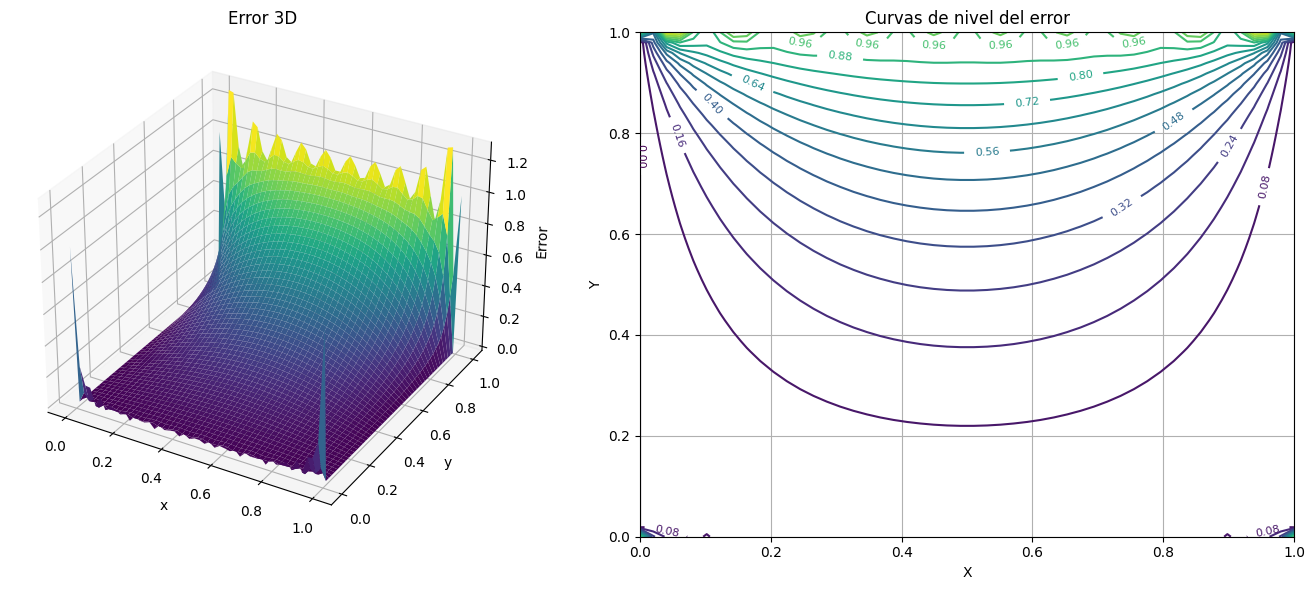

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calcular_potencial(V0, a, b, x, y, N=10):
    suma = 0  # Inicializa la variable para la suma de la serie.
    # Bucle que suma los términos de la serie que corresponden a los números impares hasta 2*N-1.
    for n in range(1, 2*N, 2):
        # Calcula el numerador de la fórmula del término n-ésimo.
        numerador = ((2*V0*np.sinh(n*np.pi*y/a)) - (V0*np.sinh(n*np.pi*(b-y)/a)))
        # Calcula el denominador de la fórmula del término n-ésimo.
        denominador = np.sinh(n*np.pi*b/a)
        # Acumula la suma del término n-ésimo multiplicado por la función sinusoidal en la dirección x.
        suma += (1/n) * (numerador/denominador) * np.sin(n*np.pi*x/a)
    # Retorna el valor del potencial multiplicado por un factor constante.
    return (4/np.pi) * suma

def actualizar_potencial(V):
    V_nuevo = V.copy()
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):

            V_nuevo[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])

    return V_nuevo


def inicializar_matriz_con_condiciones(N, M, v0):
    V = np.zeros((N, M))
    V[0, :] = -v0
    V[-1, :] = v0
    return V


def resolver_laplace(N, M, v0, epsilon=1e-5):
    V = inicializar_matriz_con_condiciones(N, M, v0)  # Inicia la matriz con las condiciones de frontera.
    delta = 1.0  # Establece una variable para controlar la convergencia del método.
    # Bucle que se ejecuta hasta que el cambio máximo en la matriz sea menor que un umbral dado por epsilon.
    while delta > epsilon:
        V_nuevo = actualizar_potencial(V)  # Actualiza la matriz de potenciales.
        # Calcula la diferencia máxima entre la matriz actualizada y la anterior.
        delta = np.max(np.abs(V_nuevo - V))
        V = V_nuevo  # Actualiza la matriz original con la nueva matriz.
    # Retorna la matriz de potenciales resuelta.
    return V

# Define una función para calcular el error entre las dos soluciones del potencial y graficar este error.
def calcular_error_y_graficar(V_serie, V_numerico):
    error = np.abs(V_serie - V_numerico)  # Calcula el valor absoluto de la diferencia entre las dos matrices de potenciales.
    # Obtiene las dimensiones de la matriz para configurar la malla de puntos para el gráfico.
    N, M = V_serie.shape
    # Genera la malla de puntos.
    X, Y = np.meshgrid(np.linspace(0, 1, M), np.linspace(0, 1, N))

    # Configura la figura para los gráficos.
    fig = plt.figure(figsize=(14, 6))
    # Añade un subplot para el gráfico 3D del error.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    # Grafica la superficie del error en 3D.
    ax.plot_surface(X, Y, error, cmap='viridis')
    # Establece el título y las etiquetas de los ejes para el gráfico 3D.
    ax.set_title('Error 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Error')

    # Añade otro subplot para el gráfico de curvas de nivel del error.
    ax1 = fig.add_subplot(1, 2, 2)
    # Habilita la cuadrícula para una mejor visualización.
    ax1.grid()
    # Configura las etiquetas y el título para el gráfico de curvas de nivel.
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Curvas de nivel del error')
    # Genera las curvas de nivel y añade etiquetas a cada línea de contorno.
    Lvl_crvs = ax1.contour(X, Y, error, levels=20)
    ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

    # Ajusta el diseño de la figura y muestra los gráficos.
    plt.tight_layout()
    plt.show()


N, M = 50, 50
v0 = 1
a = 1
b = 1
x = np.linspace(0, a, M)
y = np.linspace(0, b, N)
# Crea una malla de puntos a partir de los arrays x e y.
X, Y = np.meshgrid(x, y)

# Calcula la solución de potencial usando la serie de Fourier.
V_serie = calcular_potencial(v0, a, b, X, Y, N=10)
# Calcula la solución de potencial usando la aproximación numérica.
V_numerico = resolver_laplace(N, M, v0)
# Calcula y grafica el error entre las dos soluciones de potencial.
calcular_error_y_graficar(V_serie, V_numerico)

